In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from eval import *
import pandas as pd
import numpy as np

In [27]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

# Creditcard

## Original TGAN

In [28]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan.csv', real_sep=',')
tgan_org_evaluator = DataEvaluator(real, fake)

In [29]:
tgan_org_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Regressor MSE-scores:
                                           real         fake
real_data_RandomForestRegressor_F1   6,702.1778  71,273.7009
real_data_Lasso_F1                   3,780.4699  39,423.1935
real_data_Ridge_F1                   3,765.3264  41,980.3375
real_data_ElasticNet_F1              8,201.2538  16,290.2491
fake_data_RandomForestRegressor_F1 109,555.0116  59,685.0460
fake_data_Lasso_F1                 114,422.2567  94,748.3777
fake_data_Ridge_F1                 114,325.7897  94,649.1138
fake_data_ElasticNet_F1            120,284.8555 105,561.9009

Miscellaneous results:
                                   Result
Column Correlation Distance RMSE   0.0729
Column Correlation distance MAE    0.0493
Duplicate data between sets      317.0000

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.7300
Correlation column correlations

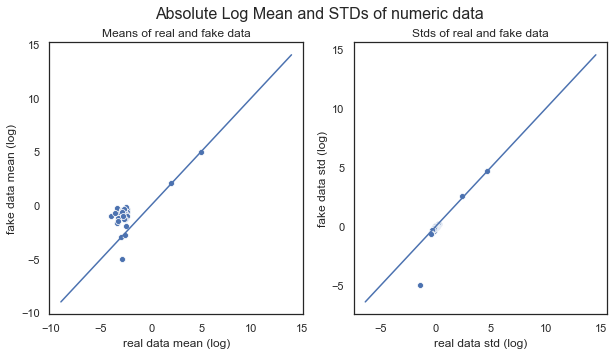

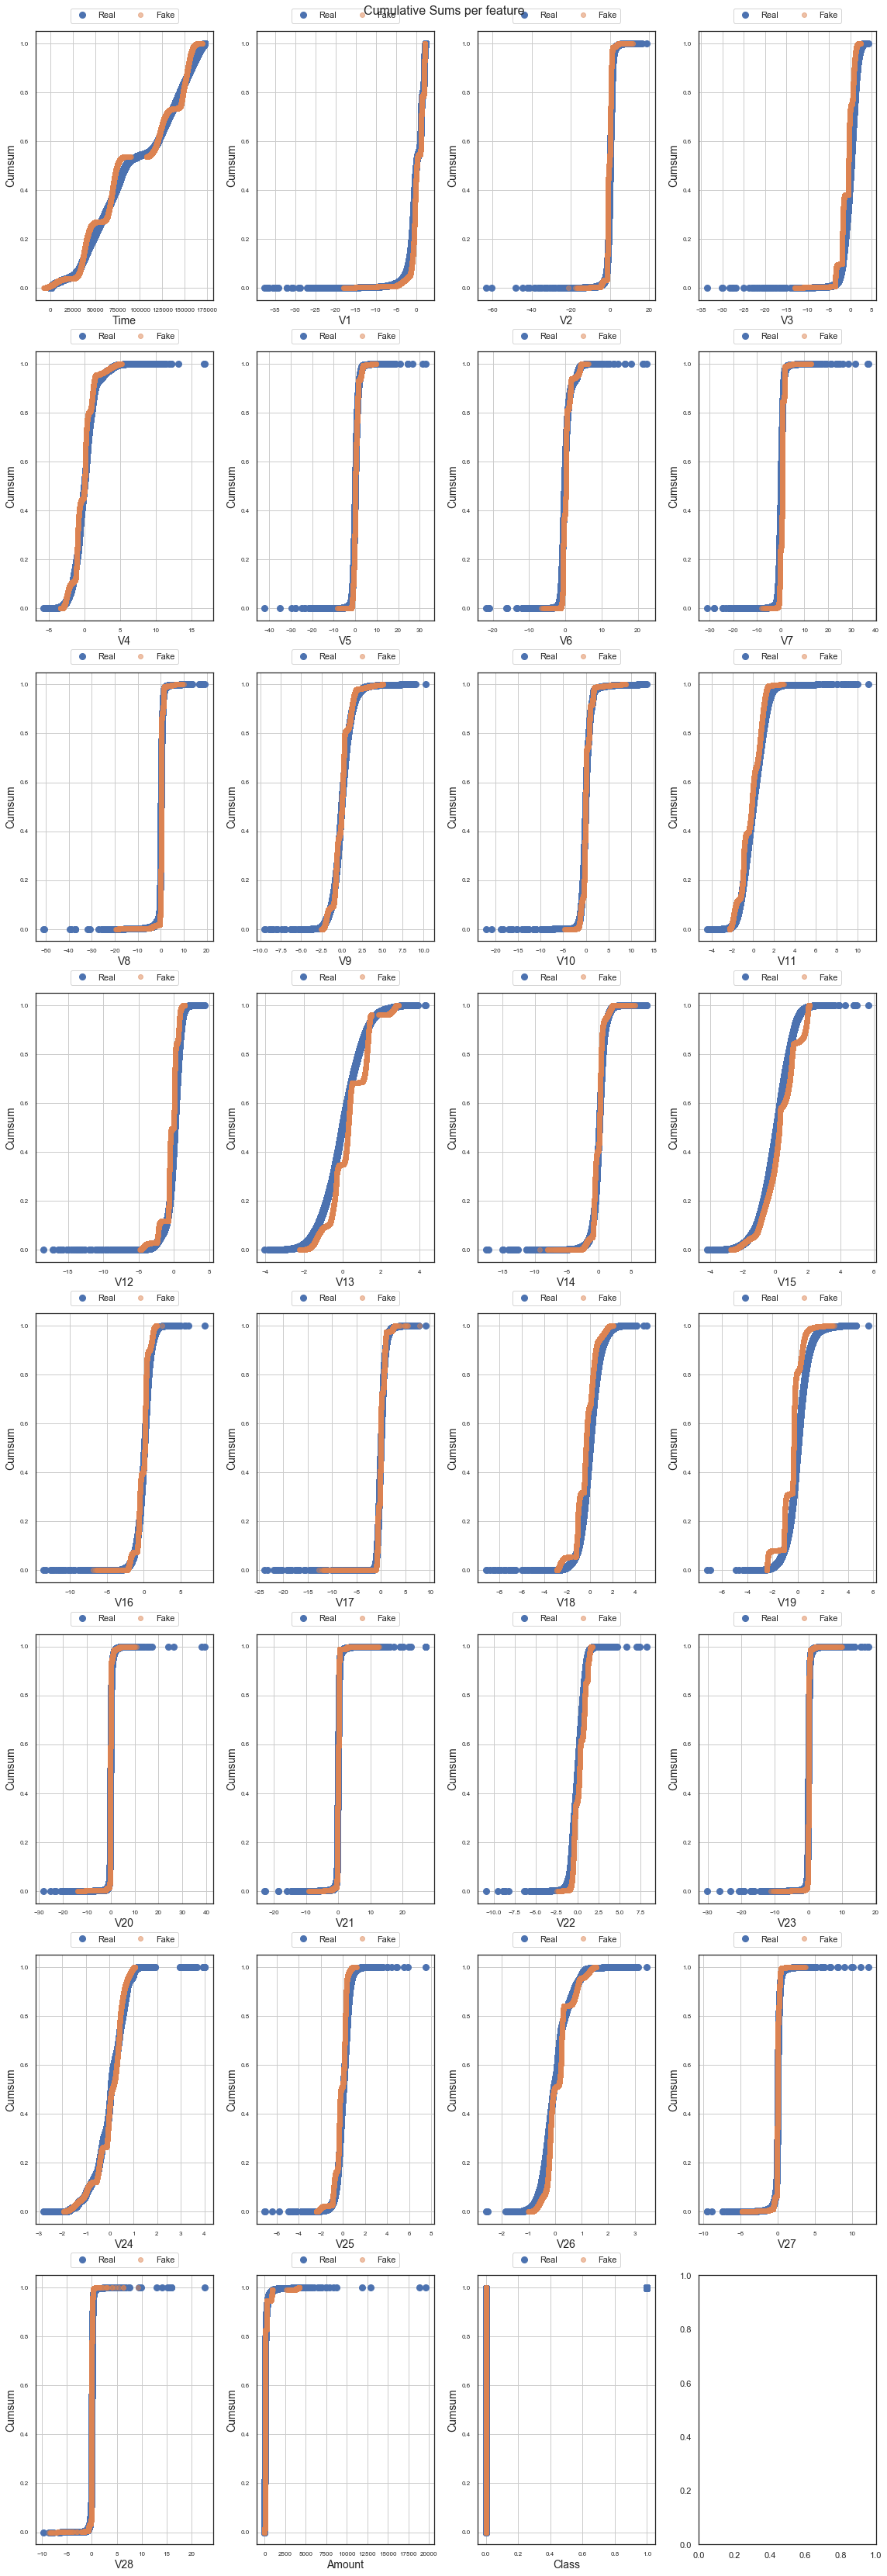

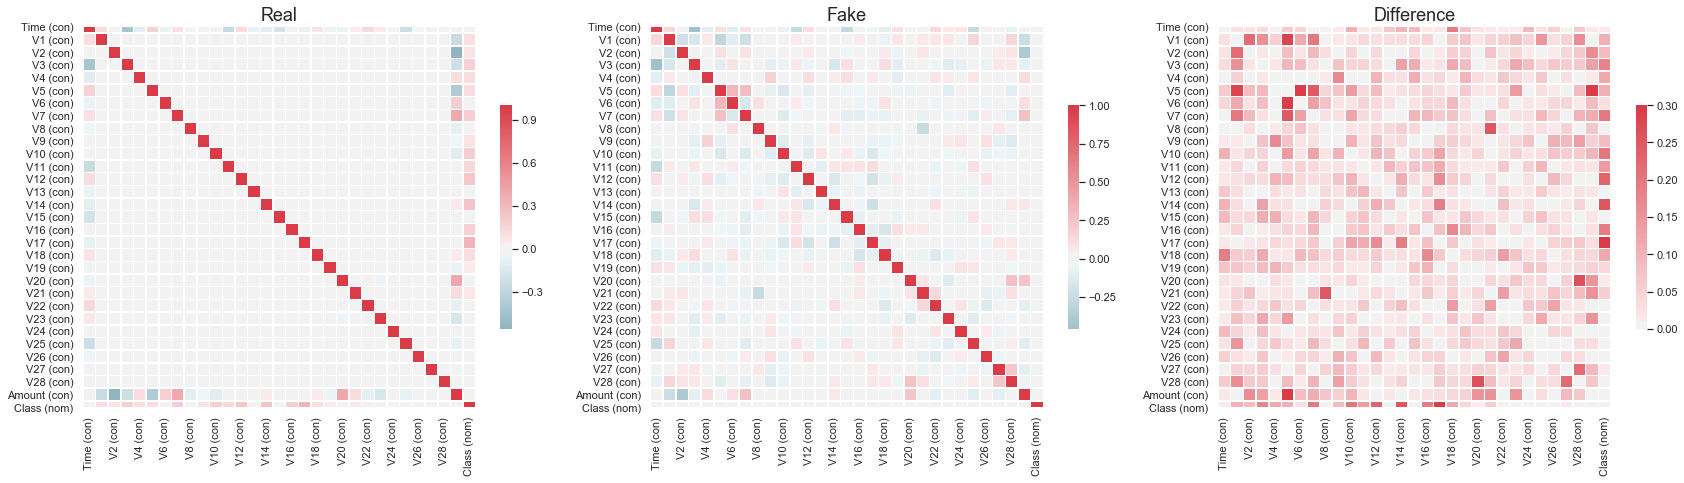

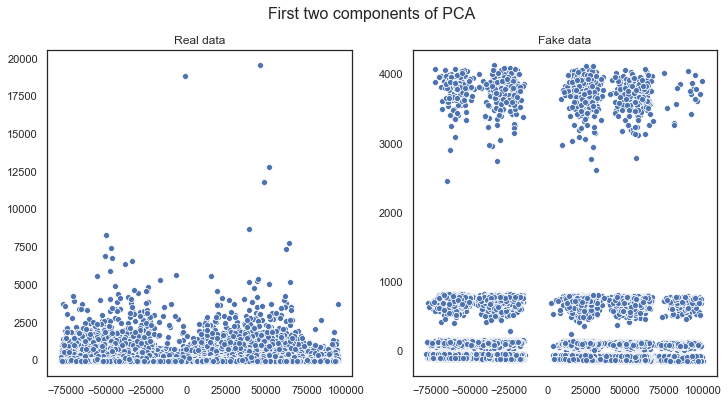

In [30]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [31]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-wgan-gp.csv', real_sep=',')
wgan_evaluator = DataEvaluator(real, fake)

In [32]:
wgan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Regressor MSE-scores:
                                          real        fake
real_data_RandomForestRegressor_F1  6,965.1498 20,502.7367
real_data_Lasso_F1                  4,403.5738 15,765.0833
real_data_Ridge_F1                  4,422.3232 15,428.6564
real_data_ElasticNet_F1             7,676.6834 21,693.2702
fake_data_RandomForestRegressor_F1 52,237.6477 42,811.5855
fake_data_Lasso_F1                 60,830.1560 48,044.6842
fake_data_Ridge_F1                 61,554.6682 47,999.5031
fake_data_ElasticNet_F1            51,981.1121 49,024.6389

Miscellaneous results:
                                   Result
Column Correlation Distance RMSE   0.0559
Column Correlation distance MAE    0.0364
Duplicate data between sets      327.0000

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.8196
Correlation column correlations                 0

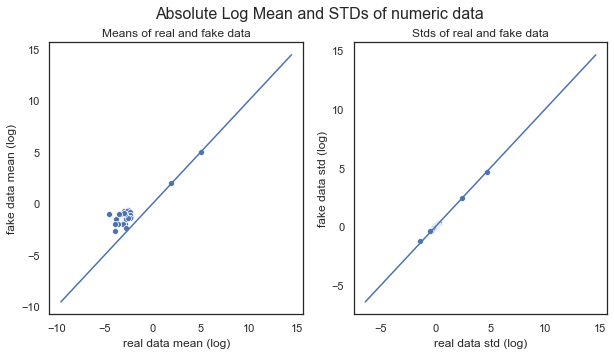

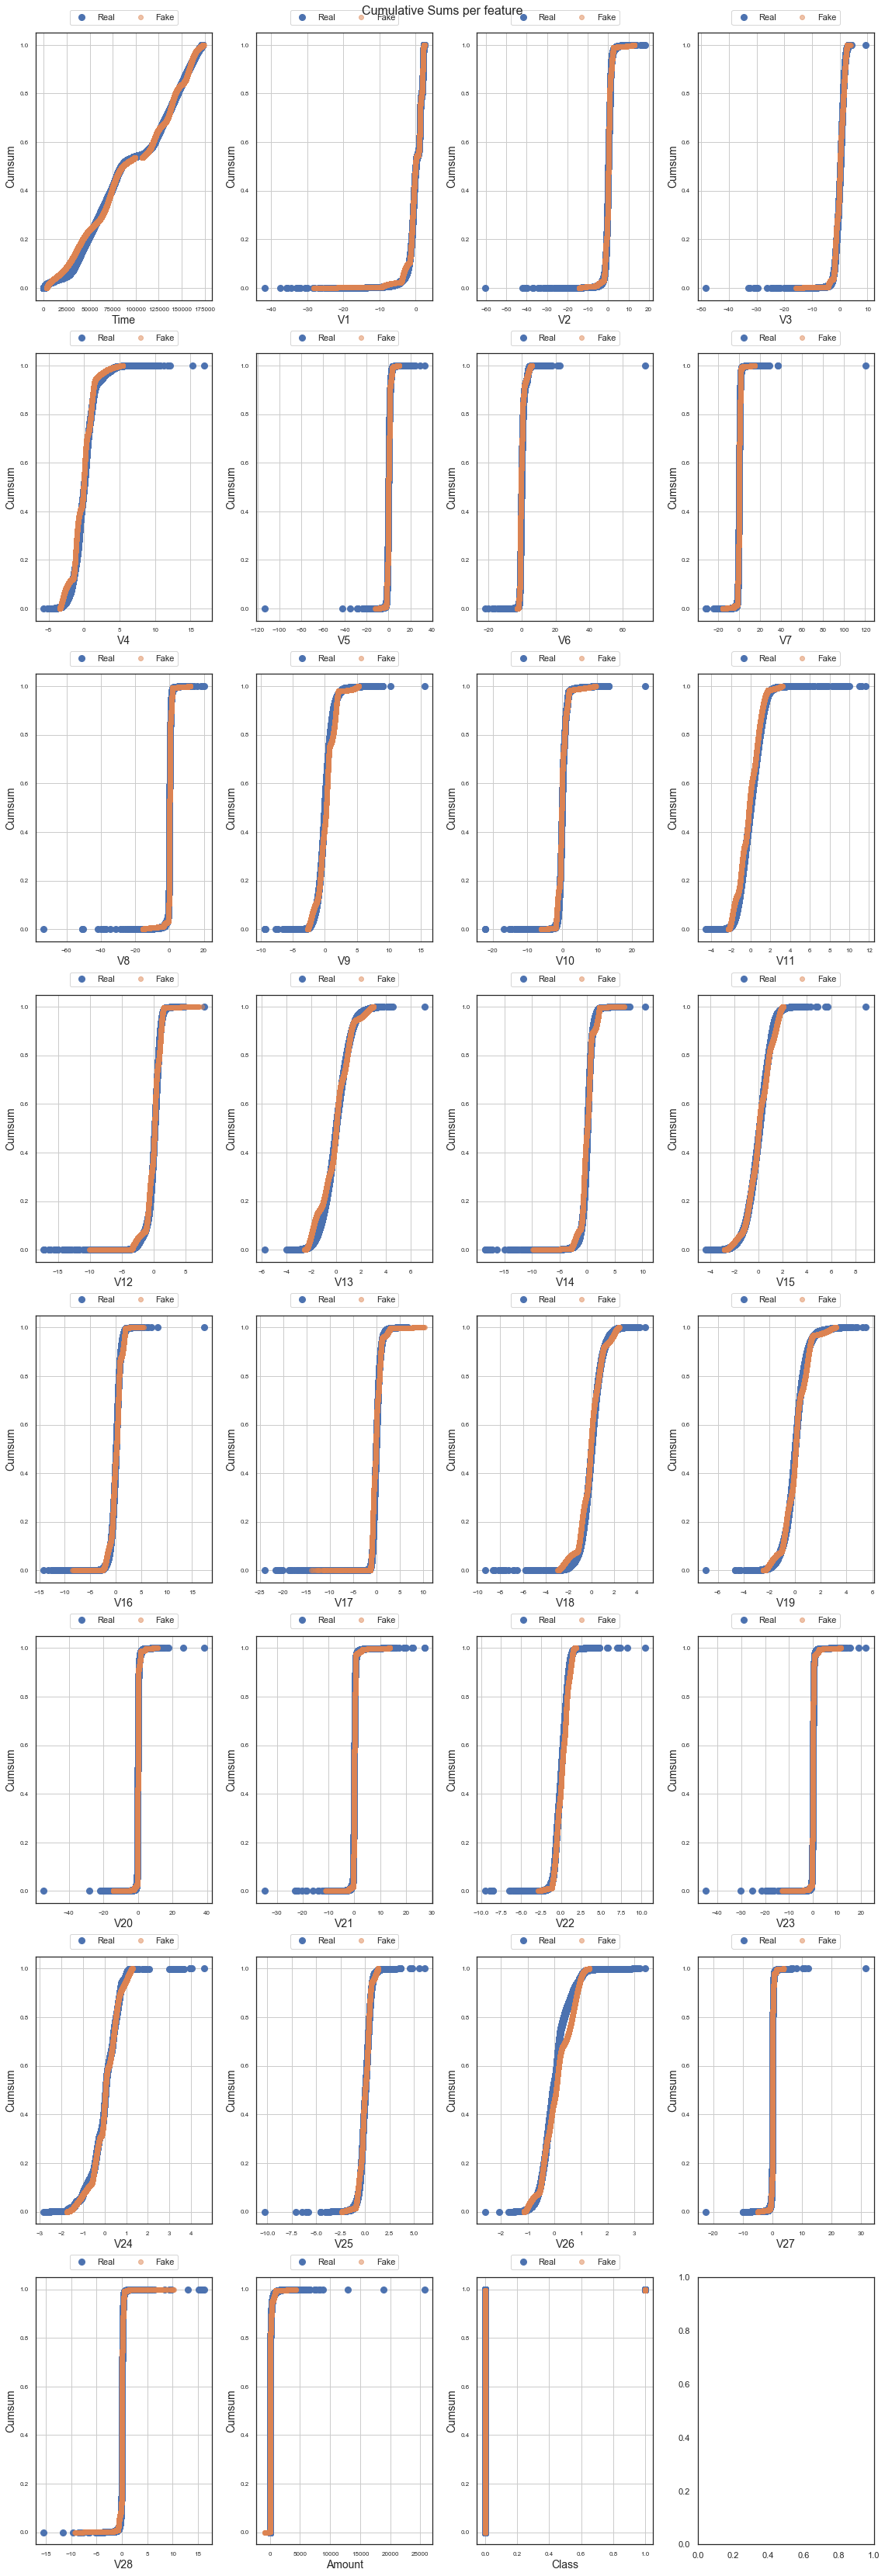

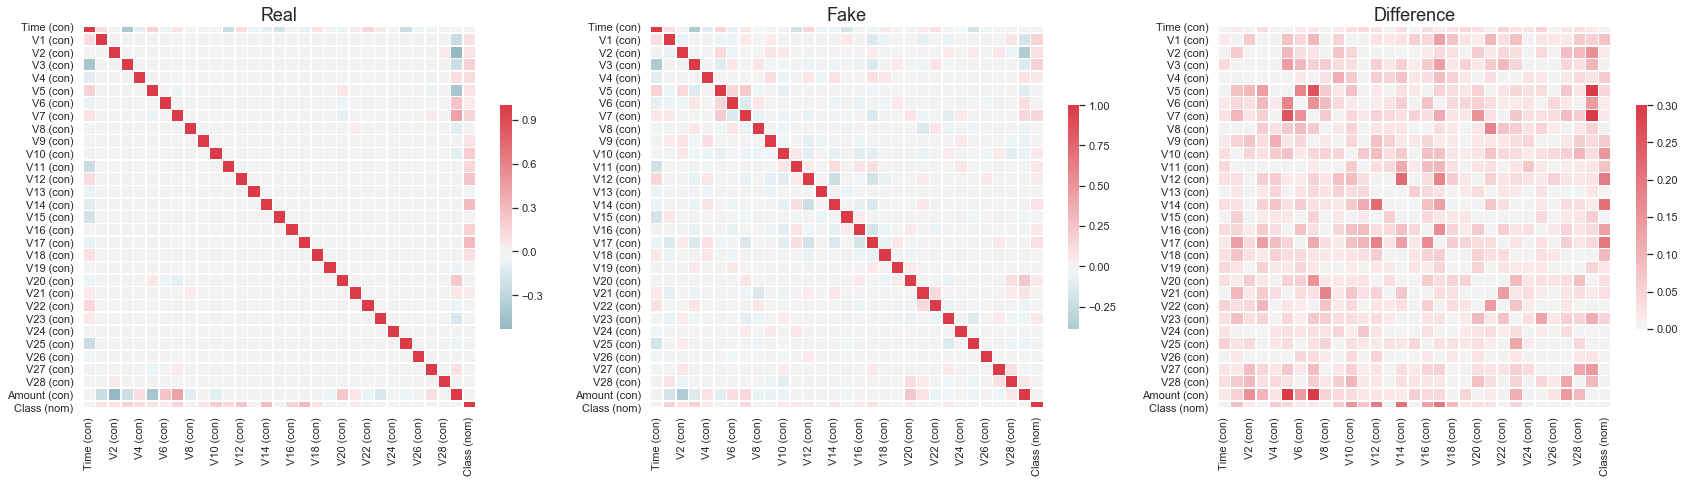

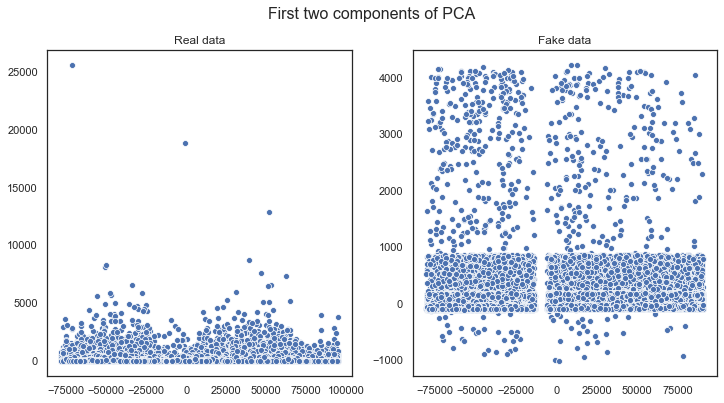

In [33]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [34]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-skip-connections.csv', real_sep=',')
skip_evaluator = DataEvaluator(real, fake)

In [35]:
skip_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Regressor MSE-scores:
                                          real        fake
real_data_RandomForestRegressor_F1  7,966.5923 30,549.9110
real_data_Lasso_F1                  4,456.6624 15,242.7119
real_data_Ridge_F1                  4,449.9696 15,201.8460
real_data_ElasticNet_F1             7,696.7519 21,757.8115
fake_data_RandomForestRegressor_F1 47,399.0430 39,764.1799
fake_data_Lasso_F1                 62,207.8980 48,057.8369
fake_data_Ridge_F1                 63,038.3009 48,157.4403
fake_data_ElasticNet_F1            51,555.9010 48,839.0176

Miscellaneous results:
                                   Result
Column Correlation Distance RMSE   0.0692
Column Correlation distance MAE    0.0478
Duplicate data between sets      309.0000

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.7835
Correlation column correlations                -0

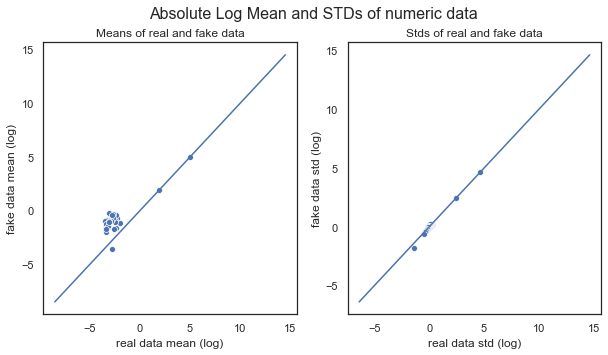

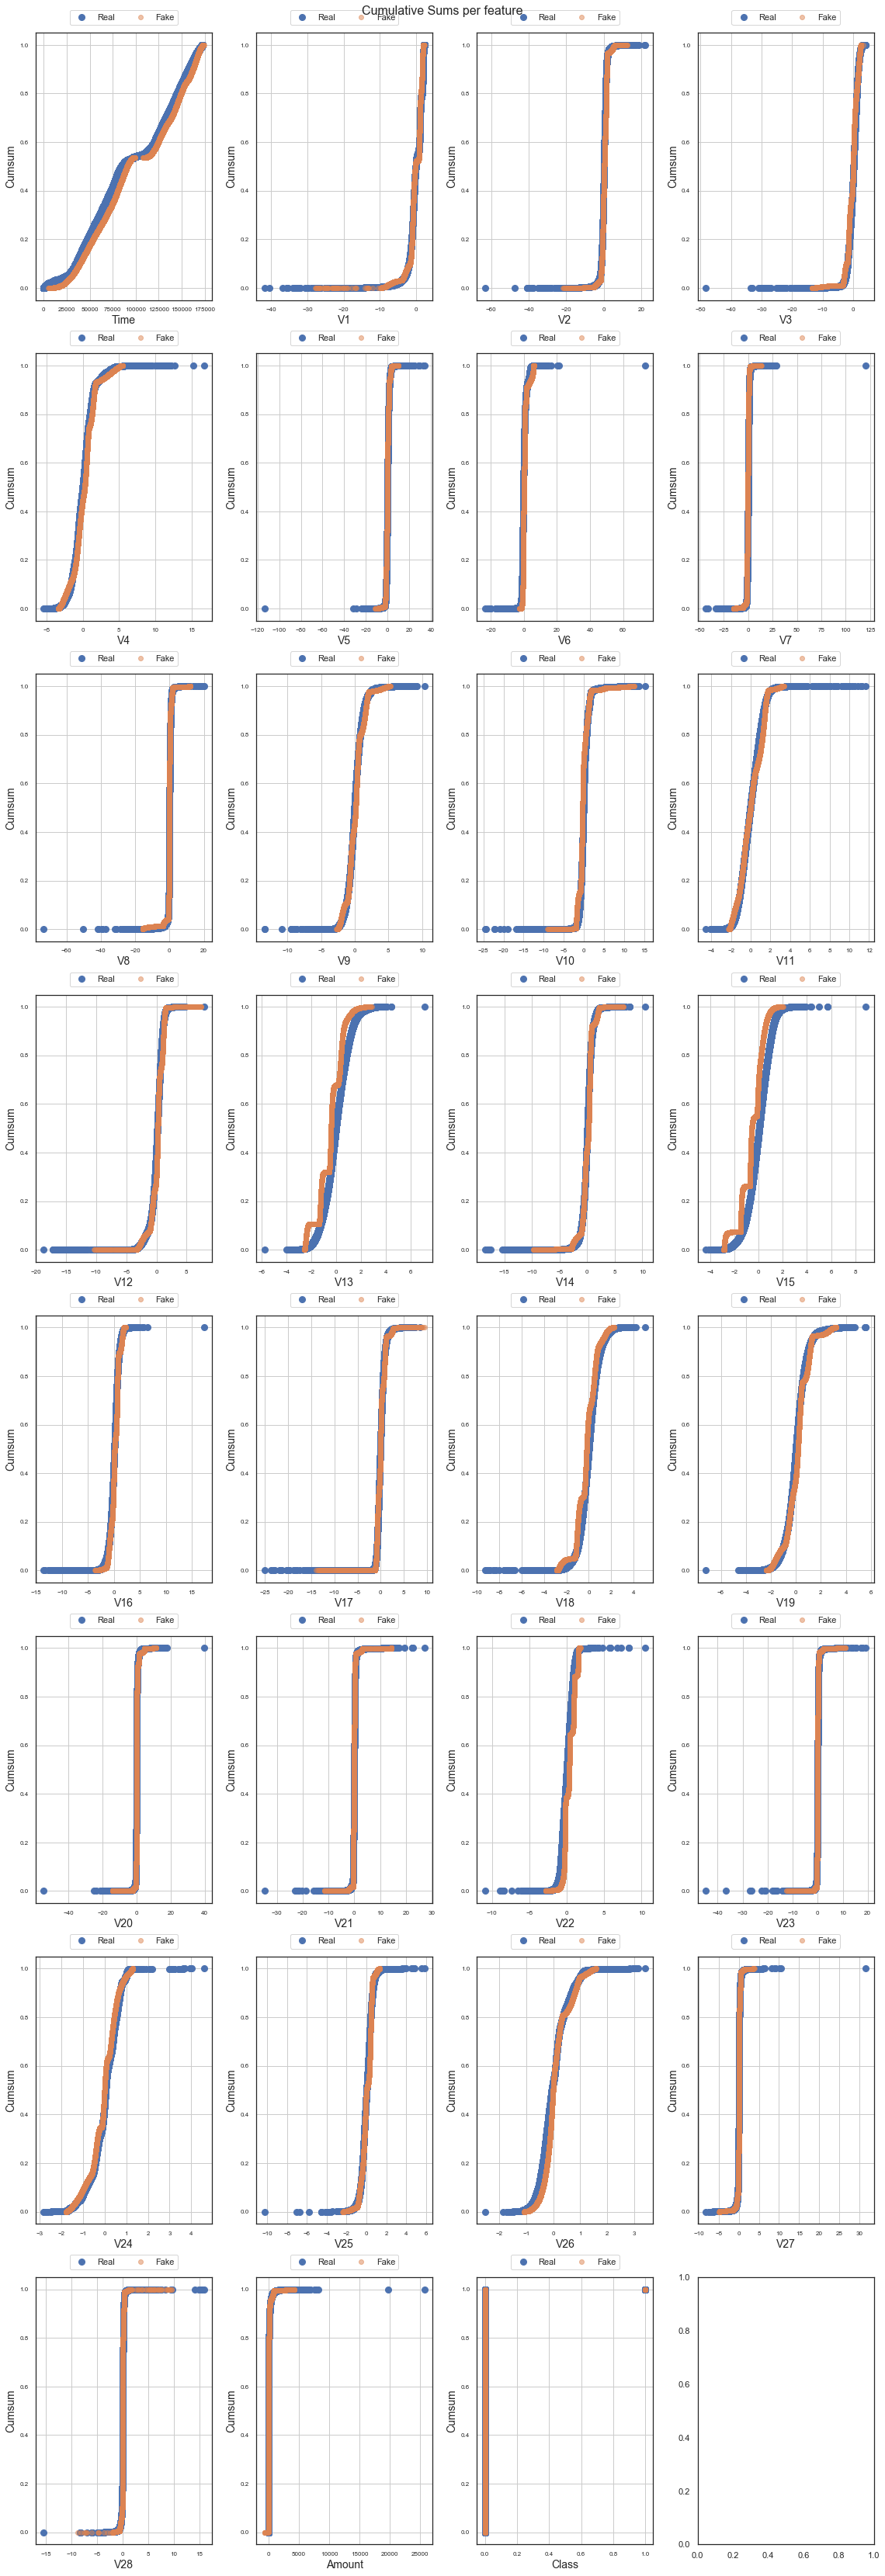

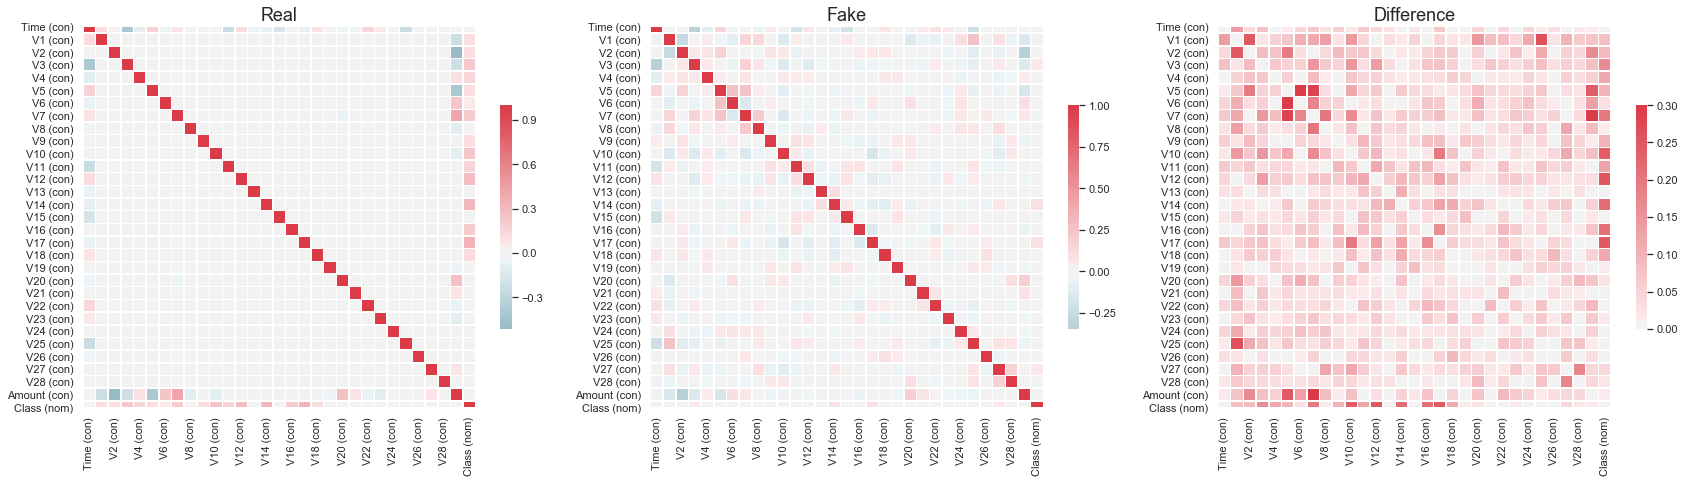

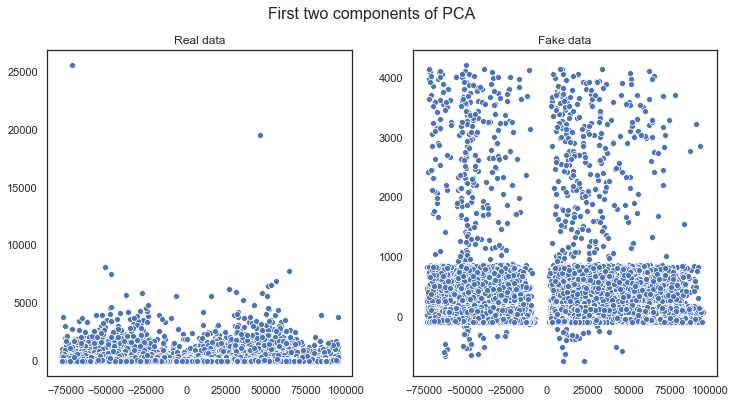

In [36]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [37]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_medgan_100.csv', real_sep=',')
medgan_evaluator = DataEvaluator(real, fake)

In [38]:
medgan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Regressor MSE-scores:
                                              real             fake
real_data_RandomForestRegressor_F1      7,707.6918 173,284,227.9080
real_data_Lasso_F1                      5,793.4306 114,203,466.1376
real_data_Ridge_F1                      5,711.7536  72,543,513.0208
real_data_ElasticNet_F1                10,068.3552  99,275,458.7201
fake_data_RandomForestRegressor_F1 87,284,291.2602       2,328.7219
fake_data_Lasso_F1                 29,072,535.7182       1,074.4431
fake_data_Ridge_F1                 27,959,133.5027         143.7034
fake_data_ElasticNet_F1            54,624,466.5039       4,994.9322

Miscellaneous results:
                                     Result
Column Correlation Distance RMSE     0.5612
Column Correlation distance MAE      0.4857
Duplicate data between sets      2,986.0000

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistic

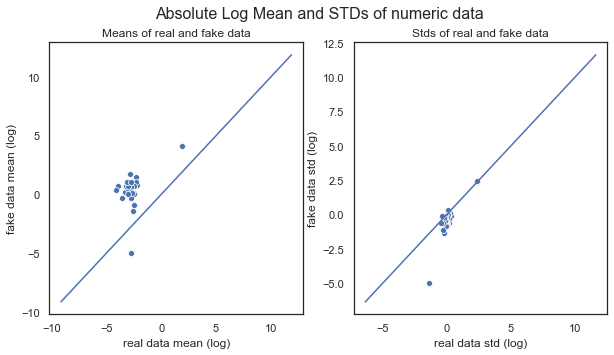

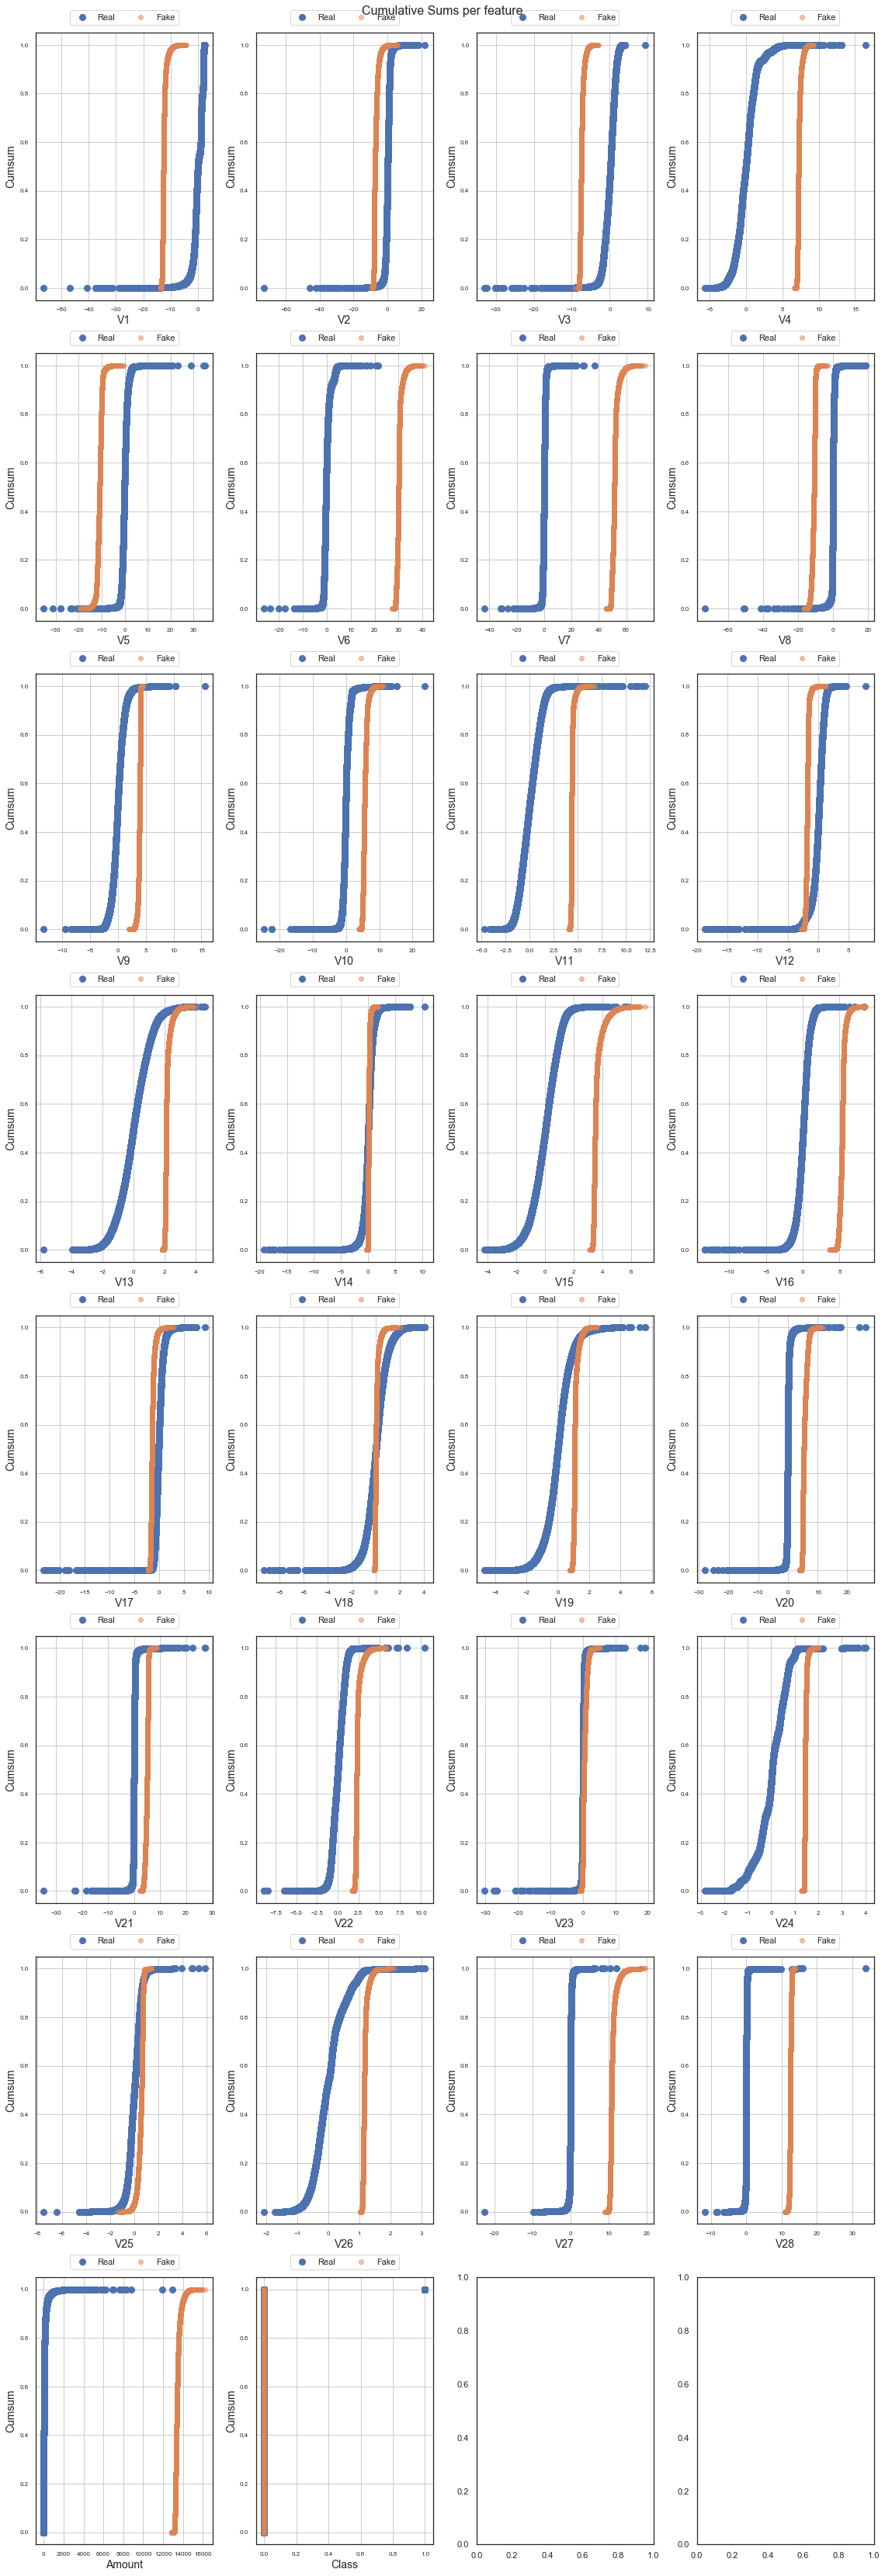

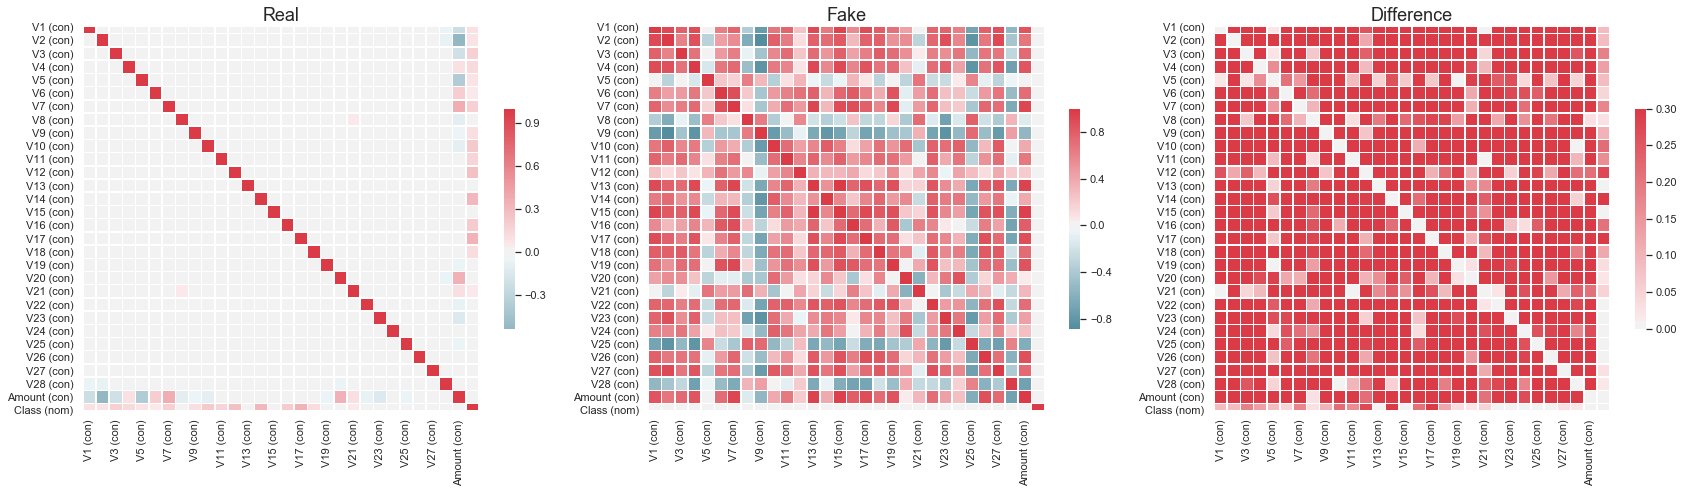

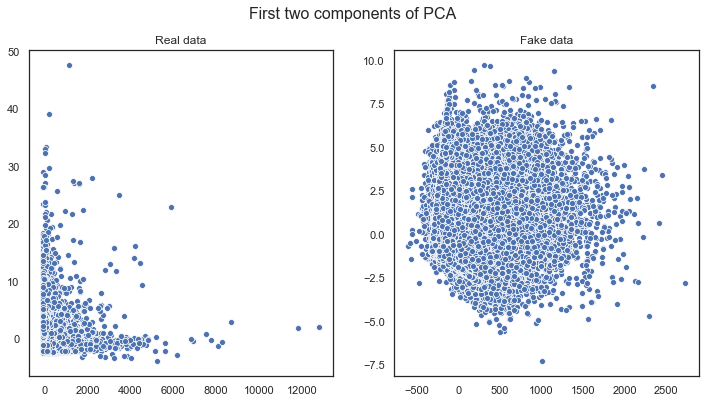

In [39]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [40]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_tablegan_100.csv', real_sep=',')
tablegan_evaluator = DataEvaluator(real, fake)

In [41]:
tablegan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: kendalltau

Regressor MSE-scores:
                                          real        fake
real_data_RandomForestRegressor_F1 11,510.9175 22,889.6264
real_data_Lasso_F1                  5,545.6207  8,240.1465
real_data_Ridge_F1                  5,348.9454  9,375.2620
real_data_ElasticNet_F1            11,534.7047 16,239.4978
fake_data_RandomForestRegressor_F1 16,325.3773 12,601.8688
fake_data_Lasso_F1                 14,791.1810 12,354.9168
fake_data_Ridge_F1                 15,140.8617 12,098.7744
fake_data_ElasticNet_F1            15,354.3780 16,260.9938

Miscellaneous results:
                                     Result
Column Correlation Distance RMSE     0.0642
Column Correlation distance MAE      0.0415
Duplicate data between sets      2,752.0000

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.7787
Correlation column correlations          

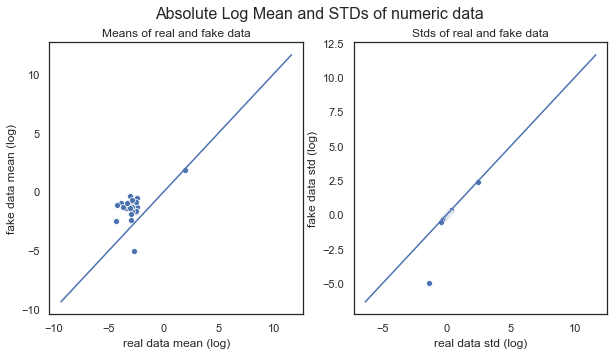

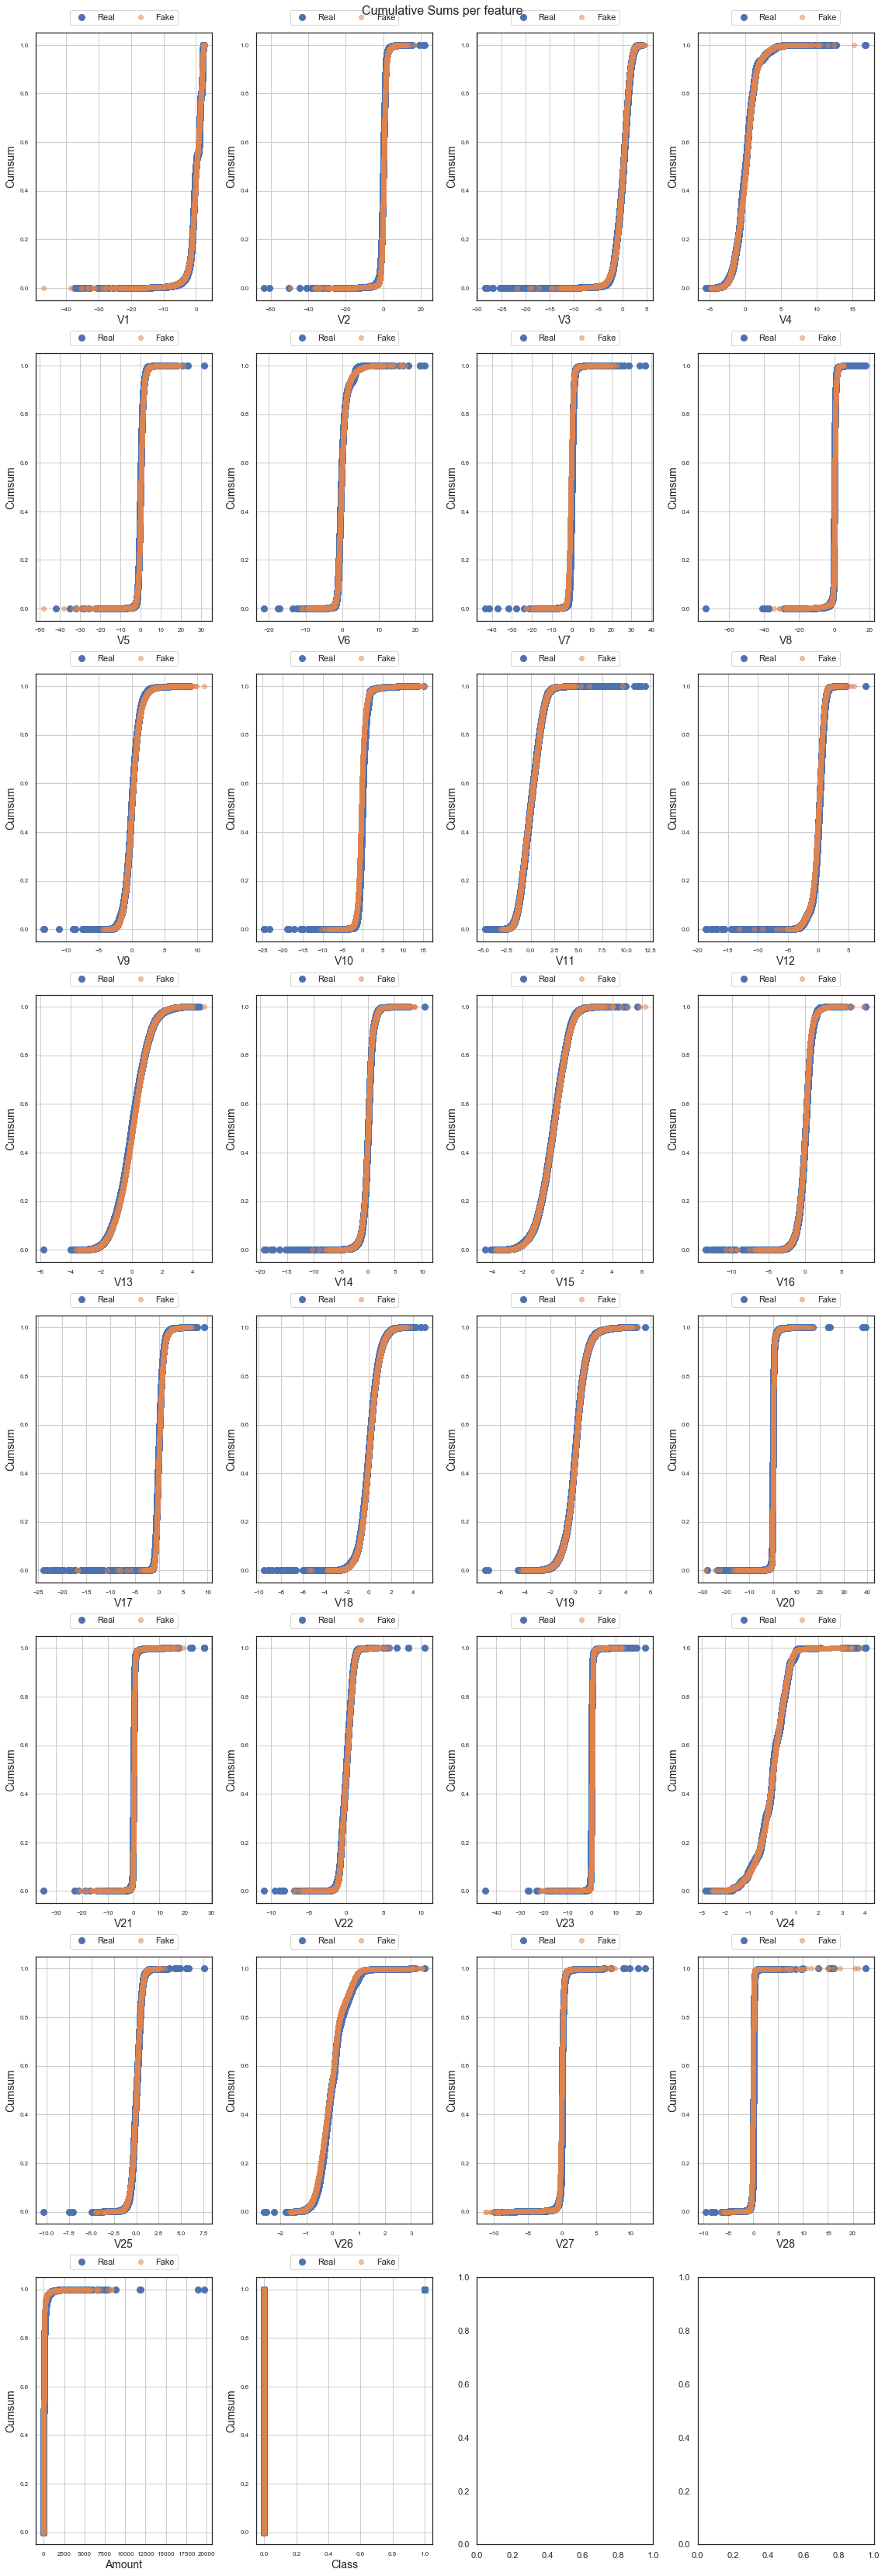

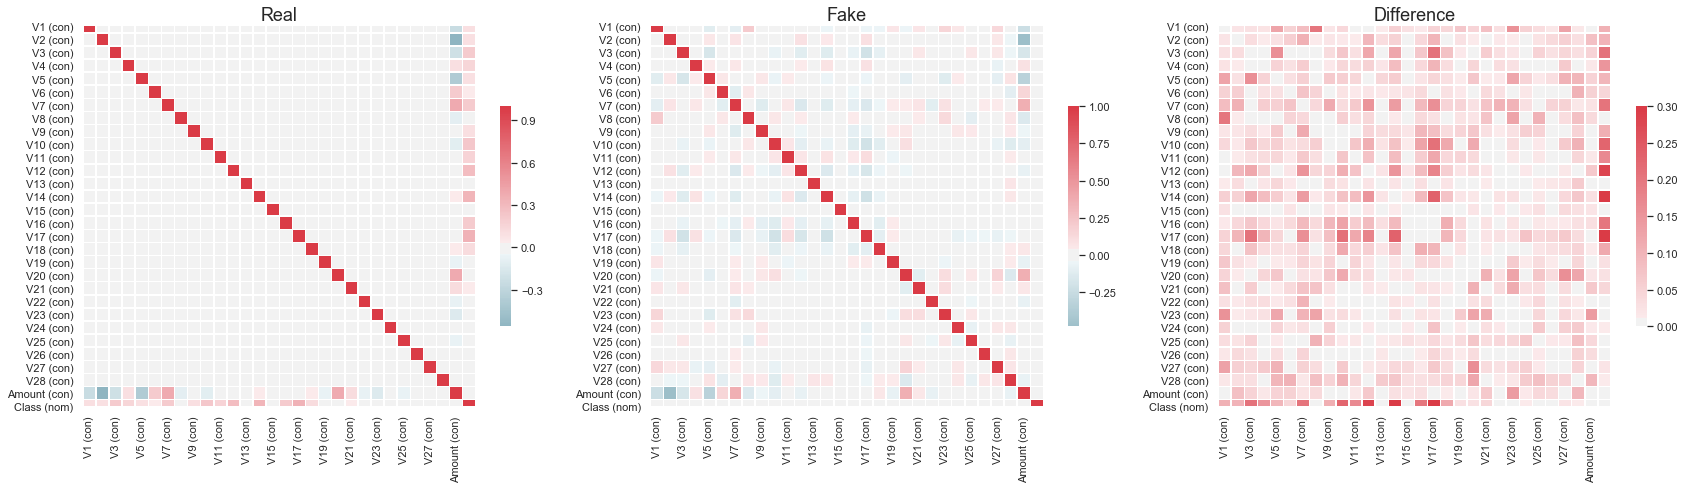

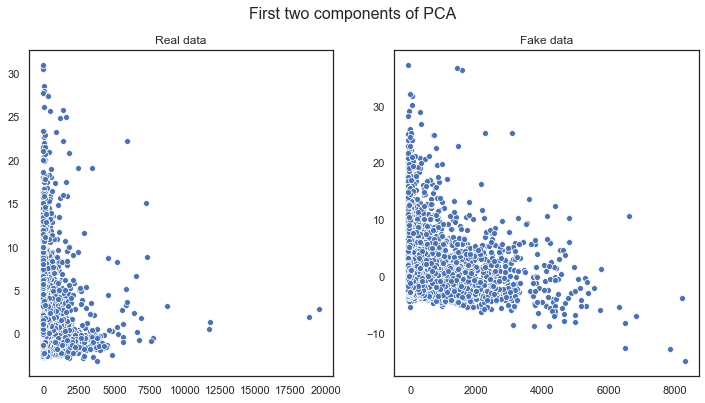

In [42]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [66]:
target_col = 'Amount'
x = numerical_encoding(tgan_org_evaluator.fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

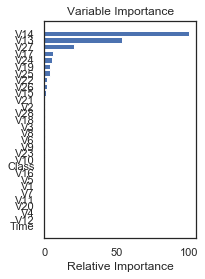

In [70]:
feature_importance = tgan_org_evaluator.f_estimators[0].feature_importances_
# print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
# print(column_names)
# print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

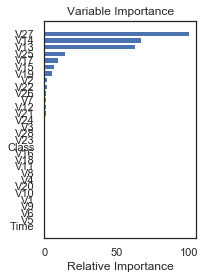

In [72]:
feature_importance = tgan_org_evaluator.r_estimators[0].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()